In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pylab as plt

In [2]:
raw_data=pd.read_csv("train.csv")
# print(raw_data[raw_data.isna().any(1)]) 

In [3]:
# creating a new file without header in order to input to networkx functions.
raw_data.to_csv("data_without_header",header=False,index=False)

In [4]:
data=pd.read_csv("data_without_header")

In [5]:
graph=nx.read_edgelist("data_without_header",delimiter=",",create_using=nx.DiGraph(),nodetype=int)

In [6]:
print(nx.info(graph))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


> From the above information we can see there are 1.86 million nodes and 9.43 million edges and on an average there are 5 Indegree and out degree i.e each node is having 5 conncetions with each other(Average)

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


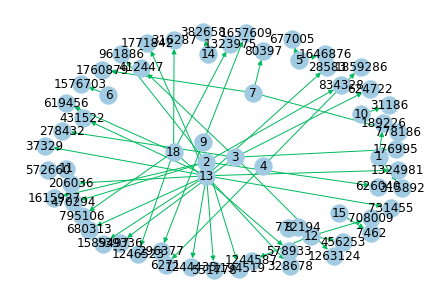

In [7]:
#since the data is huge it is computationally inefficient to visualize the graph so we sampled 50 entries to visulalize.

sample_graph=pd.read_csv("data_without_header",nrows=50)

sample_graph.to_csv("sample_50",header=False,index=False)

sub_graph=nx.read_edgelist("sample_50",delimiter=',',create_using=nx.DiGraph(),nodetype=int)

pos=nx.spring_layout(sub_graph)

nx.draw(sub_graph,pos,edge_color="#00bb5e",node_color="#A0CBE2",width=1,edge_cmap=plt.cm.Blues,with_labels=True)

print(nx.info(sub_graph))

# Exploratory Data Analysis

In [8]:
# no of unique persons

print("The number of unique nodes:",len(graph.nodes()))

The number of unique nodes: 1862220


# Number of followers does user have (Indegree)

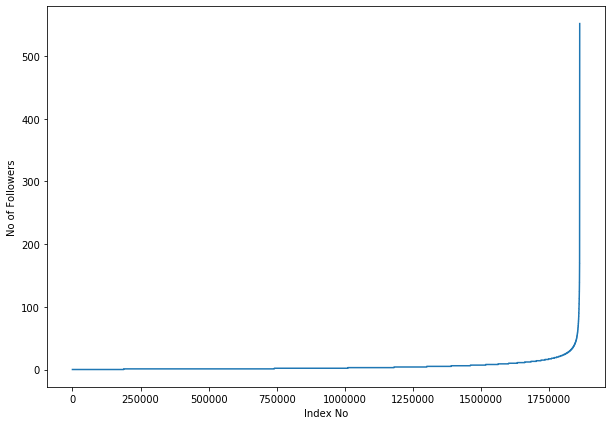

In [9]:
indegree_dict=list(dict(graph.in_degree()).values())
indegree_dict.sort()
plt.figure(figsize=(10,7))
plt.plot(indegree_dict,label="Followers")
plt.xlabel("Index No")
plt.ylabel("No of Followers")
plt.show()

As we see in the above plot majority of the users are following less than 100, in order to know approximately value, let's plot index value less than 1.75M

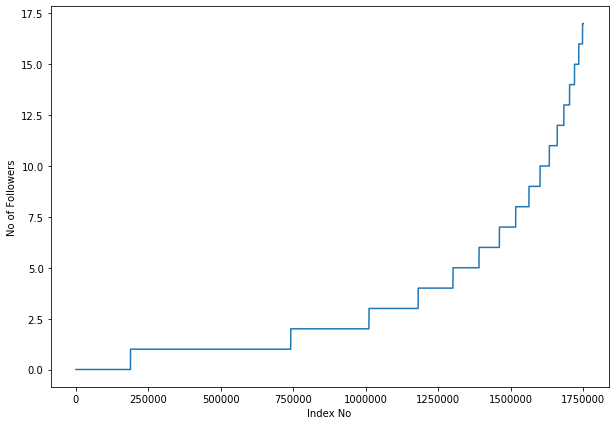

In [10]:
plt.figure(figsize=(10,7))
plt.plot(indegree_dict[0:1750000],label="Followers")
plt.xlabel("Index No")
plt.ylabel("No of Followers")
plt.show()

In [11]:
for i in range(0,11):
    print(90+i,"Percentile value is:",np.percentile(indegree_dict,90+i))

90 Percentile value is: 12.0
91 Percentile value is: 13.0
92 Percentile value is: 14.0
93 Percentile value is: 15.0
94 Percentile value is: 17.0
95 Percentile value is: 19.0
96 Percentile value is: 21.0
97 Percentile value is: 24.0
98 Percentile value is: 29.0
99 Percentile value is: 40.0
100 Percentile value is: 552.0


In [12]:
for i in range(10,110,10):
    print(99+(i/100),"percentile value is:",np.percentile(indegree_dict,(99+(i/100))))

99.1 percentile value is: 42.0
99.2 percentile value is: 44.0
99.3 percentile value is: 47.0
99.4 percentile value is: 50.0
99.5 percentile value is: 55.0
99.6 percentile value is: 61.0
99.7 percentile value is: 70.0
99.8 percentile value is: 84.0
99.9 percentile value is: 112.0
100.0 percentile value is: 552.0


From the above stastics we can conclude that on an average indegree (followers) of user are lessthan 100

# A number of users a user is following (Outdegree)

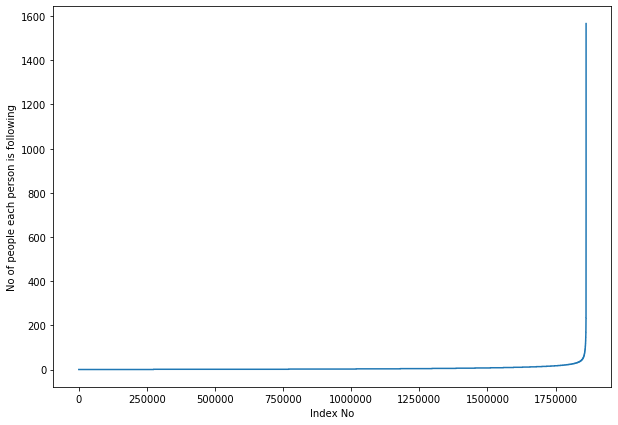

In [13]:
outdegree_dict=list(dict(graph.out_degree()).values())
outdegree_dict.sort()
plt.figure(figsize=(10,7))
plt.plot(outdegree_dict,label="Followers")
plt.xlabel("Index No")
plt.ylabel("No of people each person is following")
plt.show()

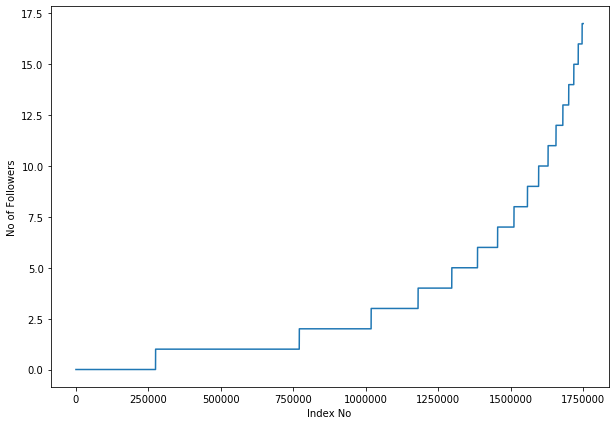

In [14]:
plt.figure(figsize=(10,7))
plt.plot(outdegree_dict[0:1750000],label="Followers")
plt.xlabel("Index No")
plt.ylabel("No of Followers")
plt.show()

In [15]:
for i in range(0,11):
    print(90+i,"Percentile value is:",np.percentile(outdegree_dict,90+i))

90 Percentile value is: 12.0
91 Percentile value is: 13.0
92 Percentile value is: 14.0
93 Percentile value is: 15.0
94 Percentile value is: 17.0
95 Percentile value is: 19.0
96 Percentile value is: 21.0
97 Percentile value is: 24.0
98 Percentile value is: 29.0
99 Percentile value is: 40.0
100 Percentile value is: 1566.0


In [16]:
for i in range(10,110,10):
    print(99+(i/100),"percentile value is:",np.percentile(outdegree_dict,(99+(i/100))))

99.1 percentile value is: 42.0
99.2 percentile value is: 45.0
99.3 percentile value is: 48.0
99.4 percentile value is: 52.0
99.5 percentile value is: 56.0
99.6 percentile value is: 63.0
99.7 percentile value is: 73.0
99.8 percentile value is: 90.0
99.9 percentile value is: 123.0
100.0 percentile value is: 1566.0


In [17]:
print("No of persons those are not following anyone are",sum(np.array(outdegree_dict)==0),"which is",round(sum(np.array(outdegree_dict)==0)*100/len(outdegree_dict),3),"%")


No of persons those are not following anyone are 274512 which is 14.741 %


In [18]:
print("no of persons having Zero followers",sum(np.array(indegree_dict)==0),"Which is",round(sum(np.array(indegree_dict)==0)*100/len(indegree_dict),3),"%")


no of persons having Zero followers 188043 Which is 10.098 %


In [19]:
count=0 
for i in graph.nodes():
    if len(list(graph.predecessors(i)))==0:
        if len(list(graph.successors(i)))==0:
            count+=1
print("Number of persons those are not following anyone and also not having followers are",count)

Number of persons those are not following anyone and also not having followers are 0


# Transforming problem to Classification problem 

In [20]:
%%time
import random
import csv
import os
import pickle
if not os.path.isfile("/Users/saisantosh/Desktop/Facebook/missing_edges_final.p"):    
    r=csv.reader(open("data_without_header",'r'))
    edges=dict()
    for edge in r:
        edges[(edge[0],edge[1])]=1

    missing_edges=set([])
    while(len(missing_edges)<9437519):
        a=random.randint(1,1862220)
        b=random.randint(1,1862220)
        tmp=edges.get((a,b),-1)
        if tmp==-1 and a!=b:
            try:
                if nx.shortest_path_length(graph,source=a,target=b)>2:
                    missing_edges.add((a,b))
                else:
                    continue

            except:

                missing_edges.add((a,b))
        else:
            continue

    pickle.dump(missing_edges,open("missing_edges_final.p","wb"))
else:
    missing_edges=pickle.load(open("missing_edges_final.p","rb"))
    

CPU times: user 2.26 s, sys: 1.8 s, total: 4.06 s
Wall time: 4.38 s


In [21]:
from sklearn.model_selection import train_test_split

df_pos=pd.read_csv("train.csv")
df_neg=pd.DataFrame(list(missing_edges),columns=['source_node','destination_node'])

print("Number of nodes in the graph with edges",df_pos.shape[0])
print("Number of nodes in the graph without edges",df_neg.shape[0])

Number of nodes in the graph with edges 9437519
Number of nodes in the graph without edges 9437519


In [22]:
# now splitting the data into 80-20 train and test data

X_train_pos,X_test_pos,y_train_pos,y_test_pos=train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2,random_state=100)
X_train_neg,X_test_neg,y_train_neg,y_test_neg=train_test_split(df_neg,np.zeros(len(df_pos)),test_size=0.2,random_state=100)


In [23]:
#making csv files
X_train_pos.to_csv("Train_pos.csv",header=False,index=False)
X_test_pos.to_csv("Test_pos.csv",header=False,index=False)
X_train_neg.to_csv("Train_neg.csv",header=False,index=False)
X_test_neg.to_csv("Test_neg.csv",header=False,index=False)

In [24]:
train_graph=nx.read_edgelist("Train_pos.csv",delimiter=',',create_using=nx.DiGraph(),nodetype=int)
test_graph=nx.read_edgelist("Test_pos.csv",delimiter=',',create_using=nx.DiGraph(),nodetype=int)

print("Training graph information")
print(nx.info(train_graph))
print("\n")
print("Testing graph information")
print(nx.info(test_graph))
print("\n")




Training graph information
Name: 
Type: DiGraph
Number of nodes: 1780753
Number of edges: 7550015
Average in degree:   4.2398
Average out degree:   4.2398


Testing graph information
Name: 
Type: DiGraph
Number of nodes: 1145385
Number of edges: 1887504
Average in degree:   1.6479
Average out degree:   1.6479




In [25]:
train_nodes_pos=set(train_graph.nodes())
test_nodes_pos=set(test_graph.nodes())

common_nodes=len(train_nodes_pos.intersection(test_nodes_pos))
per_in_train=len(train_nodes_pos-test_nodes_pos)
per_in_test=len(test_nodes_pos-train_nodes_pos)

print("Number of common users in Train and Test--",common_nodes)
print("Number of users present in Train but not in Test--",per_in_train)
print("Number of users present in Test but not in Train--",per_in_test)

Number of common users in Train and Test-- 1063918
Number of users present in Train but not in Test-- 716835
Number of users present in Test but not in Train-- 81467


In [26]:
# Final Train and Test split


X_train_pos=pd.read_csv("Train_pos.csv",names=['source_node','destination_node'])
X_test_pos=pd.read_csv("Test_pos.csv",names=['source_node','destination_node'])
X_train_neg=pd.read_csv("Train_neg.csv",names=['source_node','destination_node'])
X_test_neg=pd.read_csv("Test_neg.csv",names=['source_node','destination_node'])


X_train=X_train_pos.append(X_train_neg,ignore_index=True)
y_train=np.concatenate((y_train_pos,y_train_neg))
X_test=X_test_pos.append(X_test_neg,ignore_index=True)
y_test=np.concatenate((y_test_pos,y_test_neg))

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15100030, 2)
(3775008, 2)
(15100030,)
(3775008,)


In [28]:
# Now train and test into file 

X_train.to_csv("X_Train.csv",header=False,index=False)
X_test.to_csv("X_Test.csv",header=False,index=False)
pd.DataFrame(y_train.astype(int)).to_csv("Y_Train.csv",header=False,index=False)
pd.DataFrame(y_test.astype(int)).to_csv("Y_Test.csv",header=False,index=False)

In [29]:
print("shape of Train data:",X_train.shape)
print("shape of Test data:",X_test.shape)
print("shape of Target Train data:",y_train.shape)
print("shape of Target Test data:",y_test.shape)

shape of Train data: (15100030, 2)
shape of Test data: (3775008, 2)
shape of Target Train data: (15100030,)
shape of Target Test data: (3775008,)
